In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from time import time



In [3]:
class TimeSerie:
    amount_bins = 0
    period = 0
    num_periods = 0
    array_periods = []
    tensor_data = []

    # contructor
    def __init__(self,interval,amount_data):
        self.interval = interval
        self.amount_data = amount_data
        self.set_data()
        self.normalize()

    # set time and magnitud data for time serie
    def set_data(self):
        self.time_real = self.interval * np.sort(np.random.rand(self.amount_data))
        self.magnitud = np.random.randn(self.amount_data)

    # process to normalize time data in range 0 to 1
    def normalize(self):
        aux_time = self.time_real
        self.time =  (aux_time- aux_time.min())/(aux_time.max()-aux_time.min())

    # x axis
    def get_time(self):
        return self.time

    # y axis
    def get_magnitud(self):
        return self.magnitud

    # method for get tensor (mean,max,min,std for different periods)
    def get_tensor(self):
        return self.tensor_data

    def get_configuration_data(self):
        all_info = f'interval: {self.interval}\namount_data: {self.amount_data}\namount_bins: {self.amount_bins}\nperiod: {self.period}\nnum_periods: {self.num_periods}\narray_periods: {self.array_periods}\n'
        print(all_info)

    def set_params_data(self,amount_bins,period,num_periods):
        self.amount_bins = amount_bins
        self.period = period
        self.num_periods = num_periods

    def set_array_periods(self,array_periods):
        self.array_periods = array_periods

    def set_tensor(self,tensor):
        self.tensor_data = tensor

    # method for get time serie graphic
    def view_time_serie(self,rows=6,cols=16,font_size=18):
        title_figure = f'Time serie'
        plt.figure(figsize=(cols,rows))
        plt.plot(self.time,self.magnitud)
        plt.scatter(self.time,self.magnitud)
        plt.ylabel("Magnitud")
        plt.xlabel("Time")
        plt.suptitle(title_figure,fontsize=font_size)
        plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
        plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
        plt.show()


#Creacion de un array que contiene los T/n periodos distintos
def generate_periods(num_periods=1):
    all_period = [1]
    
    for i in range(1, num_periods):
        all_period.append(2**i)
    
    return all_period


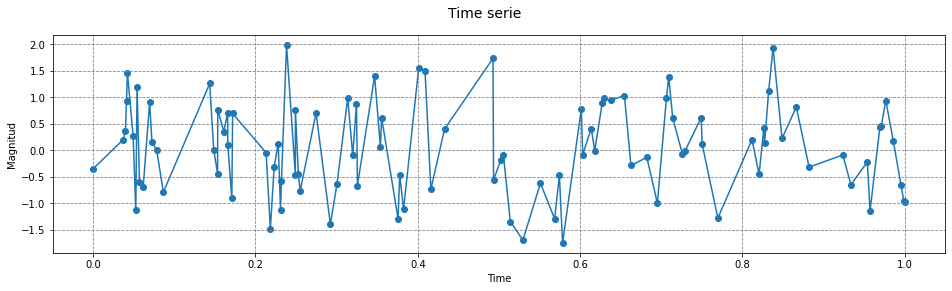

In [4]:
# Configuracion de parametros globales
# --------------------------------------
amount_bins = 10
period = 1
num_periods = 4
amount_data = 100
interval = 50

# Constructor TimeSerie()
# --------------------------------------
time_serie = TimeSerie(interval,amount_data)

# Visualizar serie de tiempo (normalizado [0,1])
time_serie.view_time_serie(4,16,14)

# Agregar parametros 
time_serie.set_params_data(amount_bins,period,num_periods)

# Obtencion y asignacion de array con los periodos a analizar
array_periods = generate_periods(num_periods)
time_serie.set_array_periods(array_periods)




In [7]:
#Creacion del grafico aplicando el metodo de folding
def drawGraphic(bins,time,mag,indice,period):
    title_figure = f'Folded Time Serie with period T/{period}'
    plt.figure(figsize=(12,4))
    plt.plot(time[indice], mag[indice])
    plt.scatter(time[indice], mag[indice])
    plt.ylabel("Magnitud")
    plt.xlabel("Time")
    plt.suptitle(title_figure, fontsize=22)
    plt.grid(axis='x', color='red', linestyle='-', linewidth=2)
    for bin in bins:
        plt.axvline(x=bin,color='red')
    plt.show()


#Funcion para obtener las estadisticas de cada bin
def getStatistic(index,indBin,magnitud):
    mag_ordered = magnitud[index]

    vector_mean = np.array([np.nanmean(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000  for i in range(amount_bins)])
    
    vector_max = np.array([np.nanmax(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    
    vector_min = np.array([np.nanmin(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    
    vector_std = np.array([np.nanstd(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])

    return [vector_mean,vector_max,vector_min,vector_std]

# funcion para variar y analizar los distintos periodos
def variantion_period(array_periods,time_serie):
    tensor_data = []
    for index, period in enumerate(array_periods):
        #valor del periodo en decimales
        period_float = 1 / period

        #proceso de folding
        folded_time = time_serie.get_time() % period_float

        #indices de los datos para encontrarlos luego del folding
        index_folded = np.argsort(folded_time)
        
        #Divido el periodo en bins o intervalos [0,n] para luego obtener datos estadisticos de cada bin
        bins = np.linspace(0,period_float,amount_bins+1)
        index_bin = np.digitize(folded_time[index_folded],bins=bins)

        # #Visualizar grafico de cada variación del periodo
        # drawGraphic(bins,folded_time,time_serie.get_magnitud(),index_folded,period)

        #Obtención de datos estadisticos de cada bin y formación del tensor
        vectorStatisticPeriod = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))
        tensor_data.append(vectorStatisticPeriod)

    return tensor_data




In [8]:
start_time = time()
tensor_output = np.array(variantion_period(array_periods,time_serie))
time_serie.set_tensor(tensor_output)
time_method = time()- start_time

print(f'Tiempo de ejecucion: {time_method}')
print('-'*100)

print('Tensor')
print(f'Dimensiones {time_serie.get_tensor().shape}')
print(time_serie.get_tensor())

# print_tensor = f'''
#                 matriz 1: T [ [mean],[max],[min],[std]]
#                 matriz 2: T/2 [ [mean],[max],[min],[std]]
#                 matriz 3: T/4 [ [mean],[max],[min],[std]]
#                 matriz 1: T/8 [ [mean],[max],[min],[std]]
                
#                 '''

# print('Forma del tensor:\n',print_tensor)




Tiempo de ejecucion: 0.0060002803802490234
----------------------------------------------------------------------------------------------------
Tensor
Dimensiones (4, 4, 10)
[[[ 0.06393163  0.28341032 -0.2375267  -0.02957853  0.65006604
   -0.93253672  0.31993581  0.29478195  0.45323421 -0.17187358]
  [ 1.45266788  1.26067117  1.98127864  1.39772238  1.73405345
   -0.09055351  1.03249974  1.38745361  1.92674425  0.93708924]
  [-1.13615515 -0.9081575  -1.48944234 -1.29282073 -0.73833552
   -1.74809719 -1.00081699 -1.28006542 -0.45531845 -1.14580914]
  [ 0.78744884  0.63212174  0.92728587  0.85481939  1.01446501
    0.62425323  0.63649651  0.75917861  0.69890884  0.64658592]]

 [[-0.12813232 -0.42432198  0.57574508  0.08075282  0.15636862
   -0.51252013  0.41950221 -0.24282639  0.33055531  0.01983285]
  [ 1.45266788  1.19990088  1.26067117  1.03249974  1.98127864
    0.70132147  1.92674425  0.81569816  1.56069262  1.73405345]
  [-1.69566339 -1.74809719 -0.08205477 -1.00081699 -1.48944234

In [53]:
# test para verificar el tiempo de ejecucion al analizar N series de tiempo
def testToAnalizeTS(amount):
    tensor_test = []
    amount_bins = 10
    period = 1
    num_periods = 3
    amount_data = 150
    interval = 50
    array_periods = generate_periods(num_periods)

    start_time = time()

    for i in range(1,amount+1):
        aux_time_serie = TimeSerie(interval,amount_data)

        aux_time_serie.set_array_periods(array_periods)
        aux_time_serie.set_params_data(amount_bins,period,num_periods)

        tensor_output = np.array(variantion_period(array_periods,aux_time_serie))
        aux_time_serie.set_tensor(tensor_output)
        
        tensor_test.append(aux_time_serie.get_tensor())
    
    time_method = time() - start_time
    return [time_method,tensor_test]


amount_event = 10000
time_method,tensor_test = testToAnalizeTS(amount_event)

tensor_test = np.array(tensor_test)
print(f'time method {time_method}')
print(f'tensor test {tensor_test.shape}')


# for index, tensor in enumerate(tensor_test):
#     tensor = np.array(tensor)
#     print(f'tensor test dimension n{index+1}: {tensor.shape}')

--------------------------------------------------
time method 34.48872375488281
tensor test (10000, 3, 4, 10)


(10000, 3, 4, 10)